In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv(r"D:\New Projects\mlproject_1\notebook\stud.csv")

In [3]:
df

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


# Data

In [4]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


# Describing data


In [5]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [6]:
df.shape

(1000, 8)

# Info


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


# Checking for missing values


In [8]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

# Checking for unique values in columns


In [9]:
unique=[]
for column in df.select_dtypes(include=['object','category']).columns:
    unique.append(df[column].unique())

In [10]:
unique

[array(['female', 'male'], dtype=object),
 array(['group B', 'group C', 'group A', 'group D', 'group E'],
       dtype=object),
 array(["bachelor's degree", 'some college', "master's degree",
        "associate's degree", 'high school', 'some high school'],
       dtype=object),
 array(['standard', 'free/reduced'], dtype=object),
 array(['none', 'completed'], dtype=object)]

# Checking Duplicate 

In [11]:
df.duplicated().sum()

np.int64(0)

# Exploring Data

In [12]:
numerical_data = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_data = [feature for feature in df.columns if df[feature].dtype == 'O']

print(numerical_data)
print(categorical_data)

['math_score', 'reading_score', 'writing_score']
['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [13]:
df['total_score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['average'] = df['total_score']/3

In [14]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [15]:
#Student with full marks in subjects
math_full = (df['math_score'] == 100).sum()
reading_full = (df['reading_score']==100).sum()
writing_full = (df['writing_score']==100).sum()


In [16]:
print(math_full)
print(reading_full)
print(writing_full)

7
17
14


Visualizing data 

<Axes: xlabel='average', ylabel='Count'>

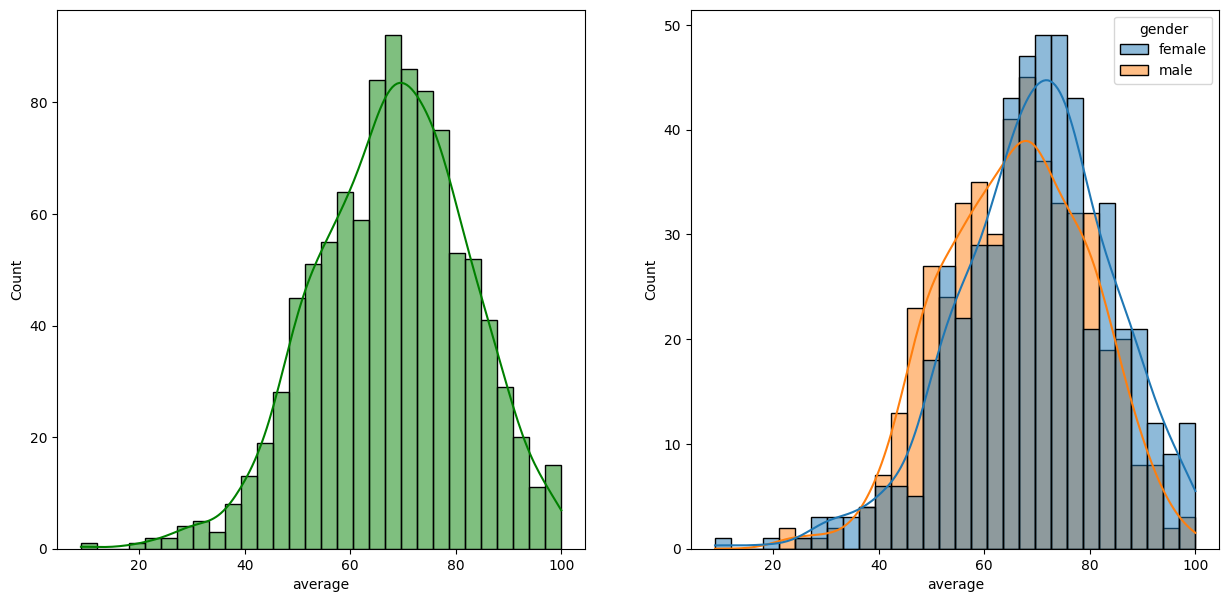

In [17]:
# Distribution
import matplotlib.pyplot as plt
import seaborn as sns

fig,ax = plt.subplots(1,2,figsize=(15,7))
sns.histplot(data=df,x='average',bins=30,kde=True,color='g',ax=ax[0])
sns.histplot(data=df,x='average',bins=30,kde=True,hue='gender',ax=ax[1])

In [31]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


<Axes: xlabel='total_score', ylabel='Count'>

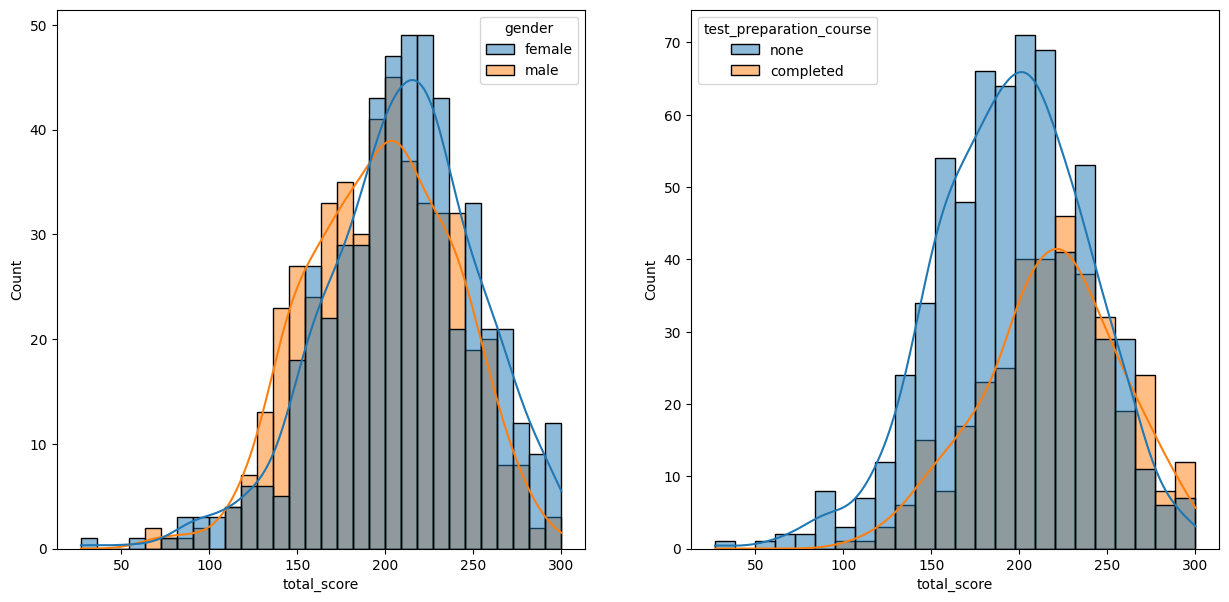

In [19]:
fig,ax = plt.subplots(1,2,figsize=(15,7))
plt.subplot(1,2,1)
sns.histplot(data=df,x='total_score',kde=True,hue='gender',bins=30)
plt.subplot(1,2,2)
sns.histplot(data=df,x='total_score',kde=True,hue='test_preparation_course')

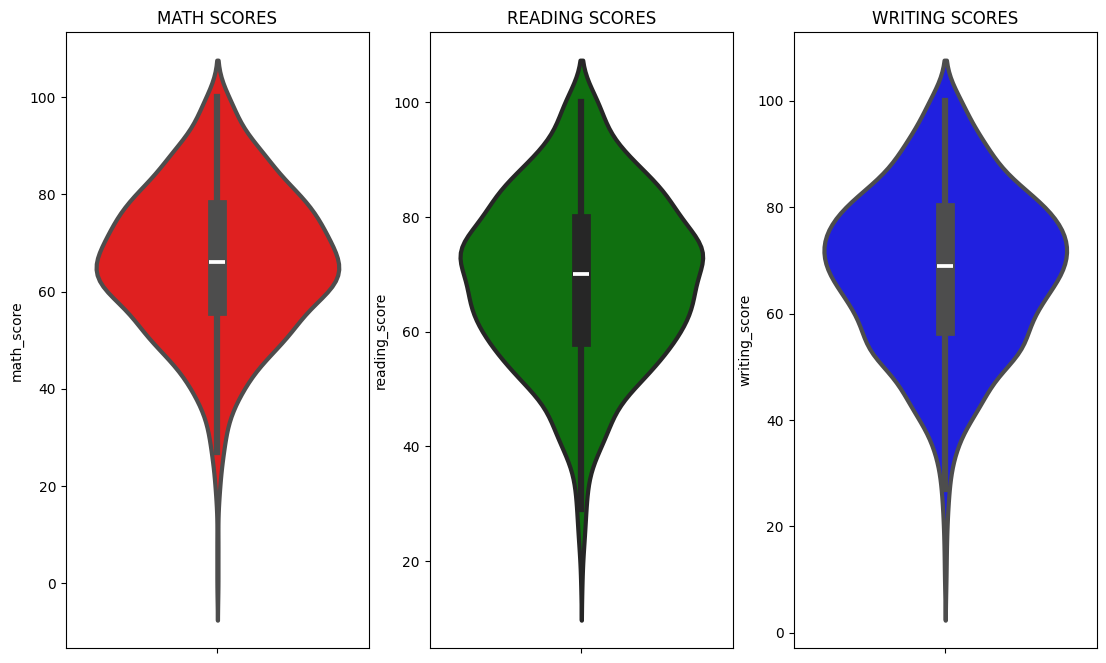

In [20]:
plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math_score',data=df,color='red',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading_score',data=df,color='green',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing_score',data=df,color='blue',linewidth=3)
plt.show()

In [21]:
print(df.columns)

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score', 'total_score', 'average'],
      dtype='object')


In [22]:
X=df.drop(columns=['math_score'],axis=1)

In [23]:
y=df['math_score']

In [25]:
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder",oh_transformer,cat_features),
        ("StandardScaler",numeric_transformer,num_features)
    ]
)

In [27]:
X = preprocessor.fit_transform(X)

In [29]:
X.shape

(1000, 21)

In [39]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [40]:
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
def evaluate_model(true,predicted):
    mae = mean_absolute_error(true,predicted)
    mse = mean_squared_error(true,predicted)
    r2_square = r2_score(true,predicted)
    return mae,mse,r2_square

In [42]:
from sklearn.linear_model import LinearRegression,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
models = {
    "linear regression": LinearRegression(),
    "Lasso" : Lasso(),
    "Decision Tree" : DecisionTreeRegressor(),
    "Random Forest" : RandomForestRegressor()
}
model_list = []
r2_list = []

for model_name,model in models.items():
    print(model_name)
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)

    model_mae,model_mse,model_r2 = evaluate_model(y_test,y_pred)

    model_list.append(model)
    r2_list.append(model_r2)

    print(f"-mae:{model_mae}\n-mse:{model_mse}\n-r2:{model_r2}")
    

linear regression
-mae:1.3468337556332698e-13
-mse:2.9008624295511225e-26
-r2:1.0
Lasso
-mae:3.7578731421148284
-mse:22.250793484434894
-r2:0.9085602868908693
Decision Tree
-mae:3.15
-mse:15.79
-r2:0.9351109401557667
Random Forest
-mae:2.1640499999999996
-mse:8.766249499999999
-r2:0.9639750672314769


In [43]:
pd.DataFrame(list(zip(model_list,r2_list)),columns=["model_name","r2_score"]).sort_values(by=["r2_score"],ascending=False)

,model_name,r2_score
0,LinearRegression(),1.000000
3,"(DecisionTreeRegressor(max_features=1.0, rando...",0.963975
2,DecisionTreeRegressor(),0.935111
1,Lasso(),0.908560


In [60]:
rf_regressor = RandomForestRegressor()
rf_regressor.fit(X_train,y_train)
y_pred = rf_regressor.predict(X_test)

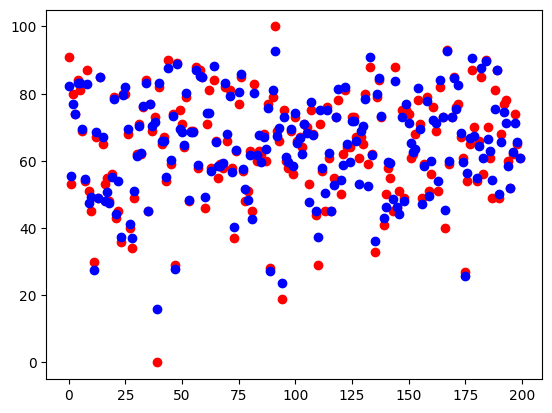

In [ ]:
plt.scatter(range(len(y_test)), y_test, color='red', label='Actual')

plt.scatter(range(len(y_pred)), y_pred, color='blue', label='Predicted')

In [72]:
range(len(y_test))

range(0, 200)

In [73]:
range(len(y_pred))

range(0, 200)